# Project: Problem Statement - Personal Loan Campaign Modelling

## Thera Bank Personal Loan Campaign
The dataset contains data on 5000 customers. The data include **customer demographic information** (age, income, etc.), the **customer's relationship with the bank** (mortgage, securities account, etc.), and the **customer response** to the last personal loan campaign (Personal Loan). 

Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

**Domain:** Banking

**Context:** This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.
<!--  
My Notes:
[About the Data] User customer demographics & relationship to understand customer response to last loan campaign.
Population 5000, accepted 480

[Context] Converting its liability customers to personal loan customers but dont lose them as depositors

Previous converstion attempt resulted in 9% success
Target: "devise campaigns with better target marketing to increase the success ratio with a minimal budget."

-->


**Objective:**
The classification goal is to predict the likelihood of a liability customer buying personal loans.


------- 
## 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)
------- 

### **Libraries Import.**

In [1]:
# Basics
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')

# Modeling
from sklearn.impute import SimpleImputer

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score


## **Data read-in & about the data**


In [2]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data

print('~~~~~~~ INFO ~~~~~~~')
print(data.info())

# All data is numerical, some may int as be boolean
print('~~~~~~~ SHAPE ~~~~~~~')
print(data.shape)
print('~~~~~~~ Null Count ~~~~~~~')
print(data.isnull().sum())

if ( data.isnull().values.any() ):
    data.isnull()
else:
    print("There are no NULL values but there may still be missing info")
    
data[['Age', 'Experience', 'ZIP Code','Income', 'Family', 'CCAvg','Education', 'Mortgage', 'Personal Loan', 'Securities Account','CD Account', 'Online', 'CreditCard']].describe().transpose()
#----------- My Checklist/Notes -----------
# Age: Ok
# Experience: (-)3 min not possible, need to check for any below 0
# Income: Ok.
# ZIP Code: Ok
# Family: Assumption:: 1 is a Single person/no family
# CCAvg: Ok
# Education: Ok, matches description
# Mortgage: 50%+ of Mortgage is 0.
# Personal Loan: Ok
# Securities Account: Ok
# CD Account: Ok
# Online: Ok
# Credit card: Ok

~~~~~~~ INFO ~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
~~~~~~~ SHAPE ~~~~~~~
(5000, 1

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


### Negative values on Experience, Zeros on Mortgage

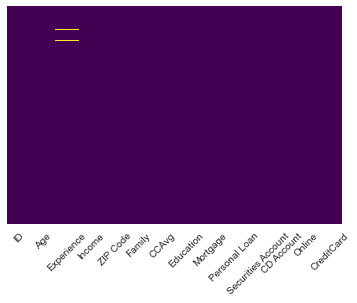

<Figure size 1152x504 with 0 Axes>

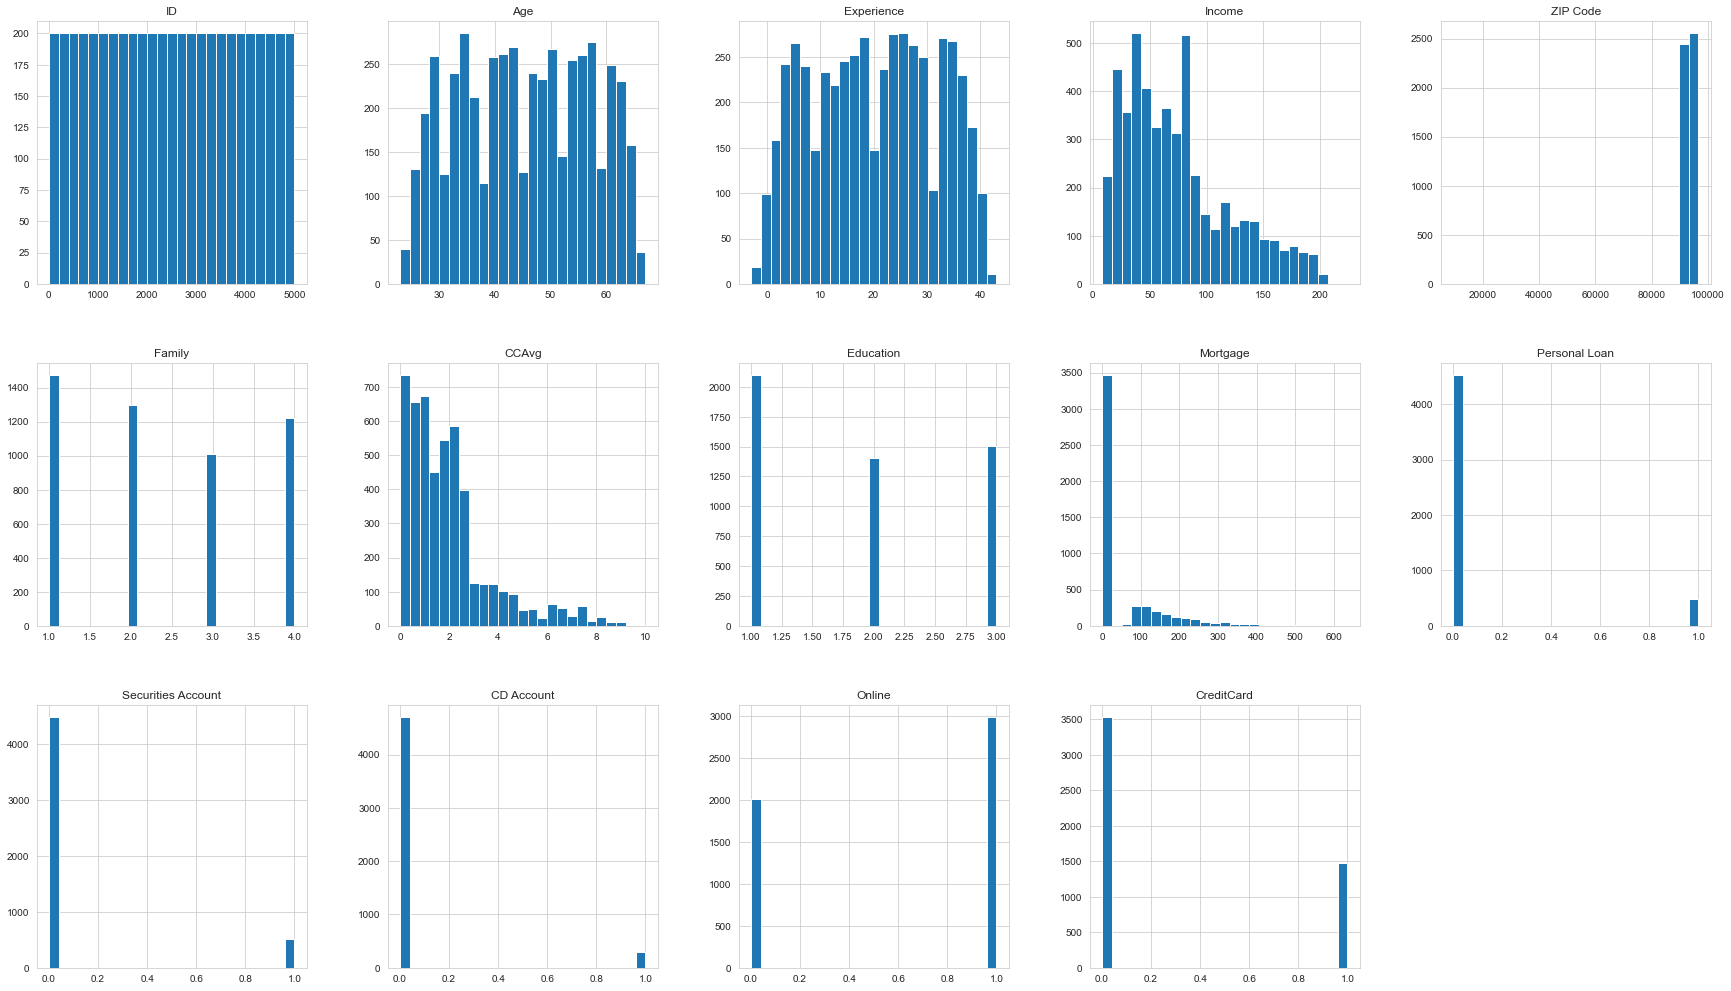

In [3]:
# Have to look at Experience and if any others are similar to this one with negative values
sns.heatmap(data[:]<0, yticklabels=False, cbar=False, cmap='viridis');
plt.xticks(rotation = 45);
plt.figure(figsize=(16,7));

# Double click to enlarge
data[:].hist(stacked=True, bins=25, figsize=(30,30), layout=(5,5));

<AxesSubplot:>

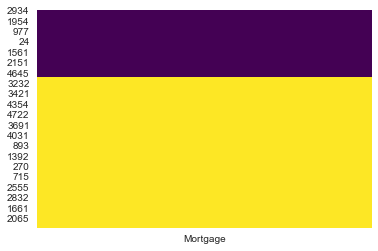

In [4]:
dataMort=data.sort_values(by=['Mortgage'], ascending=False)
sns.heatmap(dataMort[['Mortgage']]==0,square=False, cbar=False, cmap='viridis')
# thats a lot of yellow

### Impressions of the Data Set
- ID: Looking at the head & tail of ID, this can be used as key/index & dropped.
- Only CCAvg is Float values, all others are Integers. No Objects/strings/bools, etc.
- 5000 customers; 13 attribute column. Assuming ID doesn't count since it will be used as index.
###### Binary classifications.
    - Securities Account
    - CD Account
    - Online
    - CreditCard
    - Personal Loan

###### Non-Binary classifications.
    - ZIP Code: Multi category, might not relevant
    - Family: 4 category classifications
    - Education: 3 category classifications

###### Other
    - Age
    - Experience -- values less than 0, not possible
    - Income
    - CCAvg: -- Avg. credit card spend
    - Mortgage: -- Mortgage Commitment

#### Insight: 
 - No Null values present. May indicate data has been cleaned.
 - Visual confirmation of Experience having values below 0.
 - Visual confirmation of 0s in Mortgage.
      - Asumption data was already imputed but replaced with zero, instead of dropping or mean method. 
      - There is no way to validate with the current data sample.
          - These are many 0 entries, so will need to impute (again). 
 - Everything else looks like have no 'misfit' values looking at the catagorical columns.

In [5]:
#ID to be used as Index
data.set_index('ID', drop=True, append=False, inplace=True, verify_integrity=True)
data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0


Total values less than 0: 52 entries
Percent affected: 1.04 %


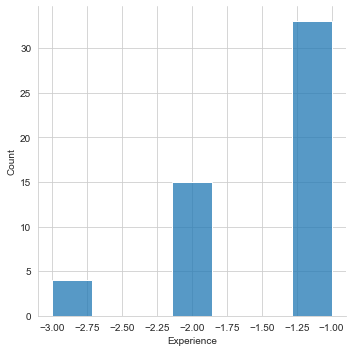

In [6]:
# Visual that Experience needs to be corrected
print('Total values less than 0:', data['Experience'][data['Experience'] < 0].count(), "entries")
print('Percent affected:', (data['Experience'][data['Experience'] < 0].count()) / (data['Experience'].count()) * 100, "%")
sns.displot(data['Experience'][data['Experience'] < 0]);

Total values less than 0: 3462 entries
Percent affected: 69.24 %


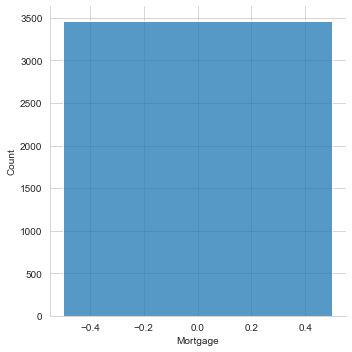

In [7]:
# Visual that Experience needs to be corrected
print('Total values less than 0:', data['Mortgage'][data['Mortgage'] == 0].count(), "entries")
print('Percent affected:', (data['Mortgage'][data['Mortgage'] == 0].count()) / (data['Mortgage'].count()) * 100, "%")
sns.displot(data['Mortgage'][data['Mortgage'] == 0]);

## Considering this is Mortgage of 0 is such a big impact, best leave it alone unless further data/information is presented.

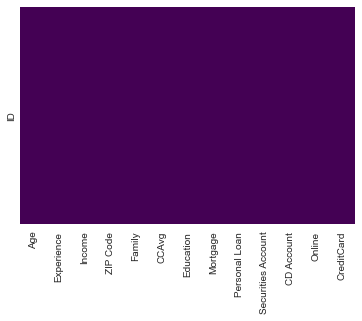

In [8]:
# # # MORTGAGE IMPUTER --- Not Active due to impact
# Replace = SimpleImputer(missing_values=0, strategy="mean")
# imputer = Replace.fit(data[['Mortgage']])
# data[['Mortgage']] = imputer.transform(data[['Mortgage']])
# sns.heatmap(dataMort[['Mortgage']]==0,square=False, cbar=False, cmap='viridis')

# # # EXPERIENCE IMPUTER --- Active, minimal impact
array = data['Experience'][data['Experience'] < 0].value_counts().transpose()
array = array.index
array
for i in range(array.min(), array.max()+1):
    Replace = SimpleImputer(missing_values=i, strategy="mean")
    imputer = Replace.fit(data[['Experience']])
    data[['Experience']] = imputer.transform(data[['Experience']])

sns.heatmap(data[:]<0, yticklabels=False, cbar=False, cmap='viridis');




# ALTERNATIVE METHOD
# Assessing what we can replace their values with
# replace_value = int(data['Experience'].mean())
# data['Experience'][data['Experience'] < 0] = replace_value

------- 
## **2. EDA - Exploratory Data Anlysis**
### Study the data distribution in each attribute and target variable, share your findings
---------

### Univariate Analysis

#### Number of unique in each column?

In [9]:
data.nunique()

Age                    45
Experience             47
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

### Insight: 
- There are 7 categorical features
    - 2 of them are multicategory: Family & Education
    - 5 of them are Y/N, binary: 'Personal Loan', 'Securities Account','CD Account', 'Online', 'CreditCard'
    - Zip has 467 unique values and not continous. Not enough value for our algorithm so will not be used.
- Our target variable is 'Personal Loan' and is a binary classification. Linear Regression would not be appropriate for this target.



#### Number of people with zero mortgage?

In [10]:
zeroMort=data['Mortgage'][data['Mortgage'] == 0].count()
ccSpend = data['CCAvg'][data['CCAvg'] == 0].count()
print("Total people with zero mortgage:", zeroMort, "that is", (zeroMort/data['Mortgage'].count()*100), "%")
print("Total people with no Credit Card spend:", ccSpend, "that is", (ccSpend/data['CCAvg'].count()*100), "%")

Total people with zero mortgage: 3462 that is 69.24 %
Total people with no Credit Card spend: 106 that is 2.12 %


### Insight: 
- Most people dont have a mortgage. Some may be renters or have paid off their home.
- only a very small set of the population in the dataset don't use credit cards.



#### Value counts of all categorical columns.
###### PART 1: I have created a dataframe for all the binary categorization

In [11]:
dfVal = pd.DataFrame(pd.Index(data['CD Account']).value_counts().to_frame().transpose())
dfVal=dfVal.append(pd.Index(data['CreditCard']).value_counts().to_frame().transpose(), ignore_index=False, verify_integrity=False, sort=False)
dfVal=dfVal.append(pd.Index(data['Online']).value_counts().to_frame().transpose(), ignore_index=False, verify_integrity=False, sort=False)
dfVal=dfVal.append(pd.Index(data['Personal Loan']).value_counts().to_frame().transpose(), ignore_index=False, verify_integrity=False, sort=False)
dfVal=dfVal.append(pd.Index(data['Securities Account']).value_counts().to_frame().transpose(), ignore_index=False, verify_integrity=False, sort=False)
dfVal

,0,1
CD Account,4698,302
CreditCard,3530,1470
Online,2016,2984
Personal Loan,4520,480
Securities Account,4478,522


In [12]:
dfNorm =pd.DataFrame(pd.Index(data['CD Account']).value_counts(normalize=True).to_frame().transpose())
dfNorm=dfNorm.append(pd.Index(data['CreditCard']).value_counts(normalize=True).to_frame().transpose(), ignore_index=False, verify_integrity=False, sort=False)
dfNorm=dfNorm.append(pd.Index(data['Online']).value_counts(normalize=True).to_frame().transpose(), ignore_index=False, verify_integrity=False, sort=False)
dfNorm=dfNorm.append(pd.Index(data['Personal Loan']).value_counts(normalize=True).to_frame().transpose(), ignore_index=False, verify_integrity=False, sort=False)
dfNorm=dfNorm.append(pd.Index(data['Securities Account']).value_counts(normalize=True).to_frame().transpose(), ignore_index=False, verify_integrity=False, sort=False)
dfNorm

,0,1
CD Account,0.9396,0.0604
CreditCard,0.7060,0.2940
Online,0.4032,0.5968
Personal Loan,0.9040,0.0960
Securities Account,0.8956,0.1044


### Insight: 
- About 60% of users have online accounts.
- Customers are not heavily 'integrated' into the banks financial products.
    - On review of CD Account, Securities and Credit Card (highest at ~29%)
- The amount of Personal loans are at 10%.
    - Potential Target Market is the rest of existing customers of 90%


#### PART 2: I have separated Education, Family and Zip into their own as they are not a perfect fit to be on one table.


### Quantities

In [13]:
pd.Index(data['Education']).value_counts(ascending=True).to_frame().transpose()

,2,3,1
Education,1403,1501,2096


In [14]:
pd.Index(data['Family']).value_counts(ascending=True).to_frame().transpose()

,3,4,2,1
Family,1010,1222,1296,1472


In [15]:
pd.Index(data['ZIP Code']).value_counts(ascending=True).to_frame().transpose()

,94087,90068,94598,94970,96145,92694,91024,9307,94965,94404,...,94025,91711,91320,93943,92037,93106,90095,95616,94305,94720
ZIP Code,1,1,1,1,1,1,1,1,1,1,...,52,52,53,54,54,57,71,116,127,169


### Normalized

In [16]:
pd.Index(data['Education']).value_counts(normalize=True,ascending=True).to_frame().transpose()

,2,3,1
Education,0.2806,0.3002,0.4192


In [17]:
pd.Index(data['Family']).value_counts(normalize=True,ascending=True).to_frame().transpose()

,3,4,2,1
Family,0.202,0.2444,0.2592,0.2944


In [18]:
pd.Index(data['ZIP Code']).value_counts(normalize=True,ascending=True).to_frame().transpose()

,94087,90068,94598,94970,96145,92694,91024,9307,94965,94404,...,94025,91711,91320,93943,92037,93106,90095,95616,94305,94720
ZIP Code,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,0.0002,...,0.0104,0.0104,0.0106,0.0108,0.0108,0.0114,0.0142,0.0232,0.0254,0.0338


### Insight: 
- Education
    - Most quantity in order of value: 1, 2, 4, 3
- Family
    - The majority of customers are of value 1.
- ZIP Code is to spread and provides no value for our model with relation Personal Loan

In [19]:
cat = data[['Family','Education', 'Personal Loan', 'Securities Account','CD Account', 'Online', 'CreditCard','ZIP Code']]
contAttrib = data[['Age','Experience','Income','CCAvg','Mortgage']]

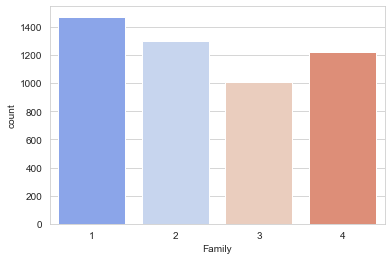

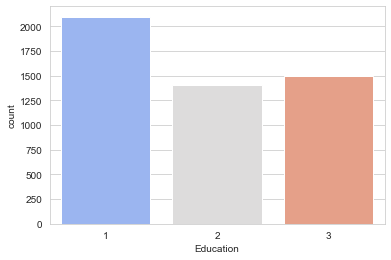

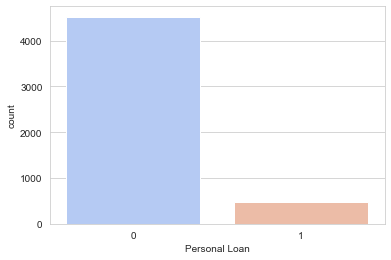

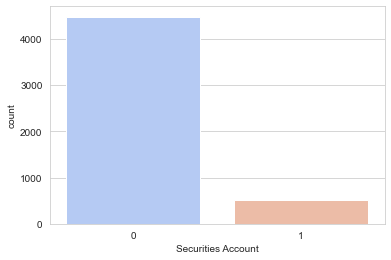

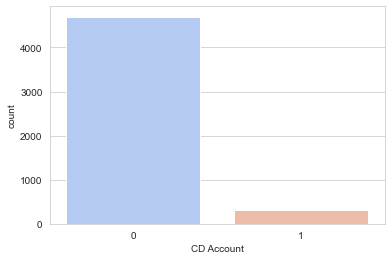

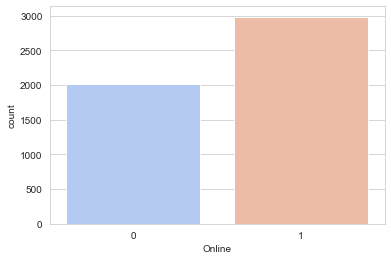

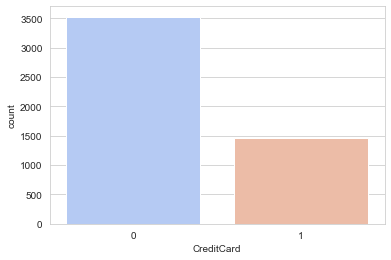

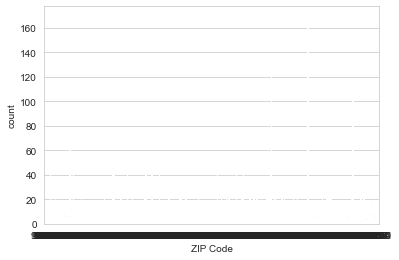

In [20]:
# Plots for Categories Ignoring ZIP CODE
for i in cat-1:
    sns.countplot(cat[i], palette='coolwarm')
    plt.show()

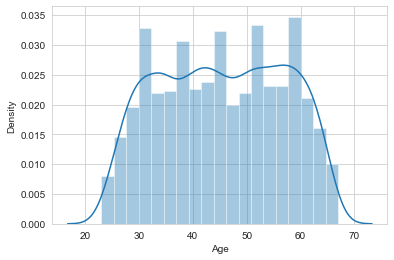

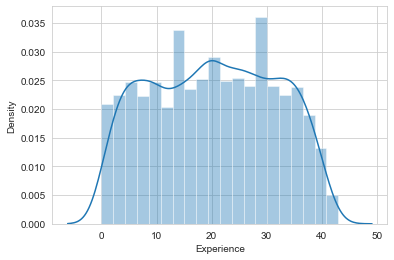

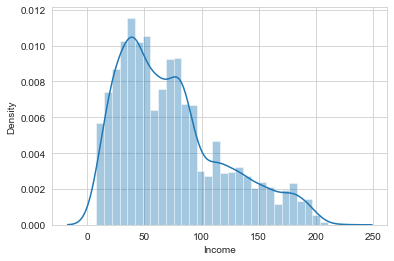

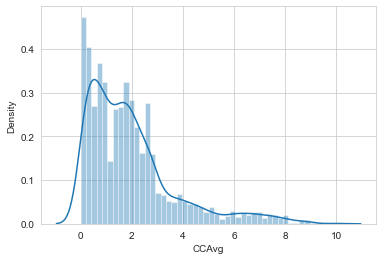

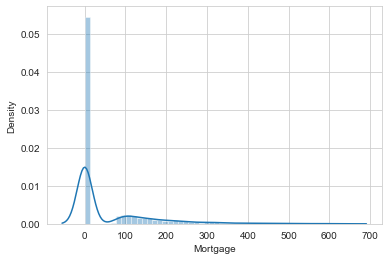

In [21]:
# Plots for Continous
for i in contAttrib:
    sns.distplot(contAttrib[i])
    plt.show()

### Insight

- Catigorical, Use of Count Plot seemed most approriate: 
    - Credit Card, CD Account, Securities Account, (personal loan) are left-skewed.
    - Online is right skewed but the use is questionable.
    - Zip code was not even considered when palette was added, indicating too many unique variables.


- Continous, used displot
    - Family, Education, Age, Experience is evently distributed.
    - Income is left-skewed.
    - Mortgage is left-skewed and highly impacted by the 0 value.


- Other considerations:
    - We can visually confirm the previously assessed.
        - Most customers are of Family value 1 that are Undergradates followed by Family value 2.
    - The bank does not have many Existing Personal Loan, Securities and CD Accounts.
        - However, Creidt card its highest Financial Product which visually seems like less than 50%.
    - Many Customers are online but there is also a large chunk that are not.

    - Age & Experience seems to be uniformly distributed with seemly high correlation.
        - We may be able to drop for our model.
    - Mortgage has a high outlier count at 0 mortgage. 
        - This could be renters or people who have paid off their mortgage. Insufficient data available to make determination.



### Bivariate Analysis

In [22]:
# Basline calculation is useful as discussin in Mentor Session
prop_Y = (data['Personal Loan'].value_counts(normalize=True))*100
print(prop_Y)
# We can see a 0-heavy inbalance as mentioned above.

# data.groupby(["Personal Loan"]).mean() #Heavily affected by outliers
data.groupby(["Personal Loan"]).median() #Better at outlier for Central tendency measure.
# Income & CCAvg may be the two points of interest 

0    90.4
1     9.6
Name: Personal Loan, dtype: float64


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,
0,45.0,20.330448,59.0,93437.0,2.0,1.4,2.0,0.0,0.0,0.0,1.0,0.0
1,45.0,20.000000,142.5,93407.0,3.0,3.8,2.0,0.0,0.0,0.0,1.0,0.0


### Notable:
   - Income & CCAvg are most impactful in favoring Personal loan outcome
        - People with Higher Income and Higher CC Avg Spend for those who accepted the loan
   - ZIP Code, CD Account, Mortgage,	Securities Account,	CD Account,	Online,	CreditCard may be ones to exclude


#### High level view (organized)

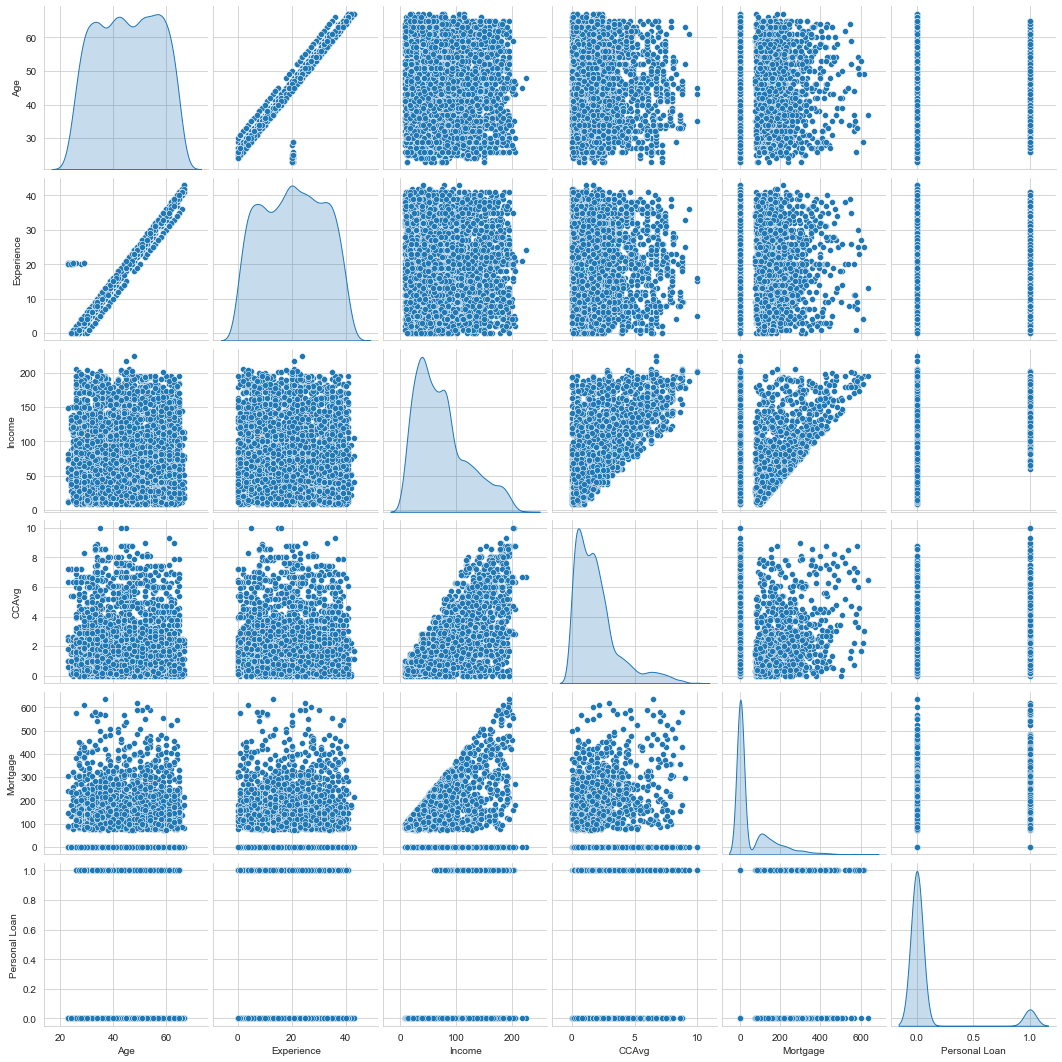

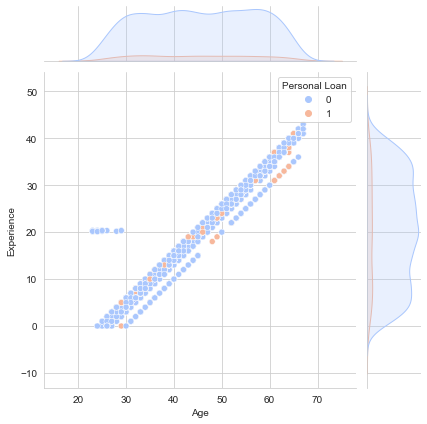

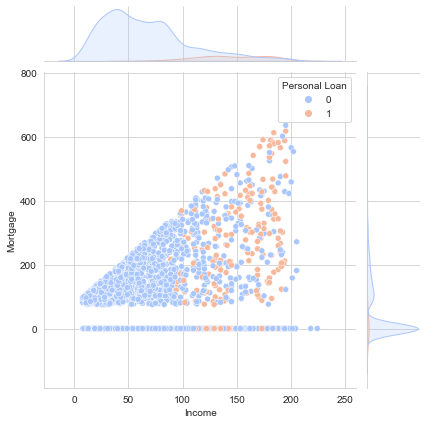

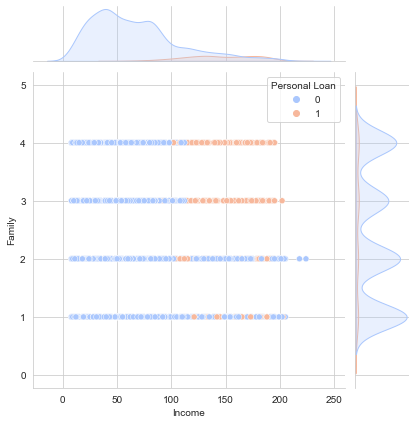

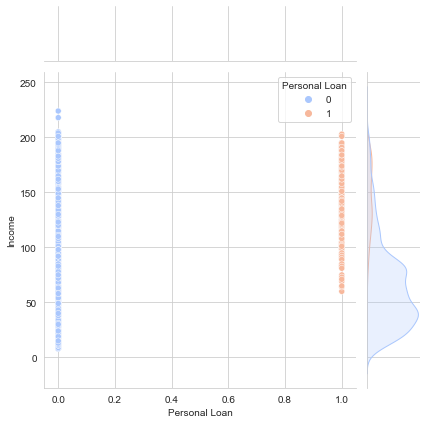

In [23]:
#Re-ordered the columns to concentrate on continous & personal loan. Double click to zoom in.
sns.pairplot( data[['Age','Experience','Income','CCAvg','Mortgage','Personal Loan']],diag_kind='kde');

sns.jointplot(data=data, x='Age' , y='Experience', hue="Personal Loan" , palette='coolwarm', );
sns.jointplot(data=data, x='Income' , y='Mortgage', hue="Personal Loan",  palette='coolwarm');
sns.jointplot(data=data, x='Income' , y='Family', hue="Personal Loan",  palette='coolwarm');
sns.jointplot(data=data, x='Personal Loan' , y='Income', hue="Personal Loan",  palette='coolwarm');

**Insight:** looking at 'Experience' & 'Income', these look to looks similar to the ROC_AUC lines.



*Multi-Categorical*

In [24]:
pd.crosstab(data['Family'],data['Personal Loan'],normalize='index')
# nominal impact

Personal Loan,0,1
Family,,
1,0.927310,0.072690
2,0.918210,0.081790
3,0.868317,0.131683
4,0.890344,0.109656


In [25]:
pd.crosstab(data['Education'],data['Personal Loan'],normalize='index')
# nominal impact

Personal Loan,0,1
Education,,
1,0.955630,0.044370
2,0.870278,0.129722
3,0.863424,0.136576


*Binary-Categorical*

In [26]:
pd.crosstab(data['Securities Account'],data['Personal Loan'],normalize='index')
# nominal impact

Personal Loan,0,1
Securities Account,,
0,0.906208,0.093792
1,0.885057,0.114943


In [27]:
pd.crosstab(data['Online'],data['Personal Loan'],normalize='index')
# nominal impact

Personal Loan,0,1
Online,,
0,0.90625,0.09375
1,0.90248,0.09752


In [28]:
pd.crosstab(data['CreditCard'],data['Personal Loan'],normalize='index')
# nominal impact

Personal Loan,0,1
CreditCard,,
0,0.904533,0.095467
1,0.902721,0.097279


In [29]:
pd.crosstab(data['CD Account'],data['Personal Loan'],normalize='index')
# CD Accounts have close distribution, check feature-influences on final model using coefficients

Personal Loan,0,1
CD Account,,
0,0.927629,0.072371
1,0.536424,0.463576


<AxesSubplot:>

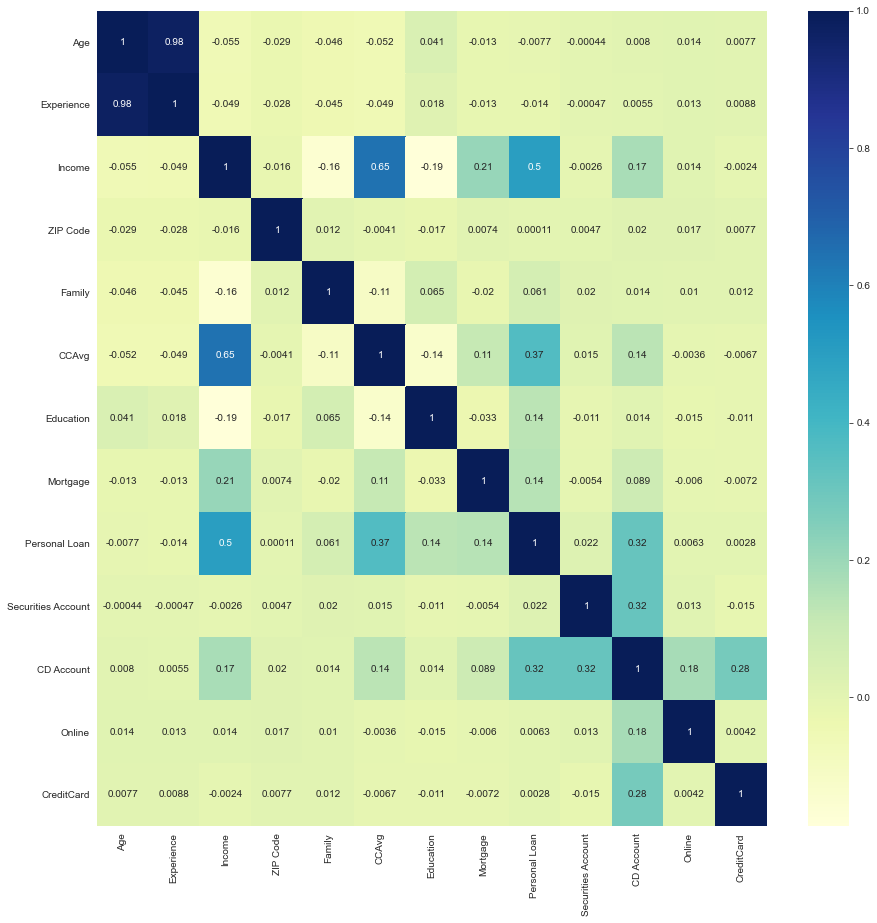

In [30]:
ig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(data.corr() , annot=True , cmap= 'YlGnBu')

### Insight
- Target variable: Personal Loan
    - While Experience & Age seem to have a linear correlation, relationship appears to have no impact on if someone took a Personal Loan last time.
    - A trend that seemed to appear, those with Higher Income & High Mortgages are more likely to take out a Personal Loan
    - A trend that seemed to appear, larger families with High Income, appear to be more likely to take a personal loan.
    - Loooking in deeper at the Income and Personal loan, those that did take the personal loan had incomes of a little over 50+ to a little over 200+ (in thousands)

- Confirmed Age & Experience have a linear relationship. May be able to substitue on another.
- Looking at the heatmap, the highest correlations with personal loan are Income, CCAvg, a CD Account (respectively)


----------------

### Get data model ready

Considerations:
 - ZIP Code,Family,Education are multicategory classifications which may need to use DUMMY. It will have an impact on the model. (do this at the end)
 
 - Personal Loan, Securities Account, CD Account, Online, CreditCard are already binary.

In [31]:
df_forModel = data[['Income', 'Family', 'CCAvg','Education', 'Mortgage', 'Securities Account','CD Account','Personal Loan']]

df_forModel['Education'][df_forModel['Education']==1] ="Undergrad" 
df_forModel['Education'][df_forModel['Education']==2] ="Graduate"
df_forModel['Education'][df_forModel['Education']==3] ="Advanced"

edu=pd.get_dummies(df_forModel['Education'], drop_first=True)
fam=pd.get_dummies(df_forModel['Family'], drop_first=True)

df_forModel = pd.concat([df_forModel,fam,edu],axis=1)
df_forModel.drop(['Education','Family'],axis=1, inplace=True)


X= df_forModel.drop(['Personal Loan'],axis=1)
y= df_forModel['Personal Loan']

---------
## 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
---------

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print("Now we have our 4 objects: \n- X_train, X_test\n- y_train, y_test\n")

print("{0:0.2f}% train/sample set".format((len(X_train)/len(df_forModel.index)) * 100))
print("{0:0.2f}% test/truth set".format((len(X_test)/len(df_forModel.index)) * 100))


Now we have our 4 objects: 
- X_train, X_test
- y_train, y_test

70.00% train/sample set
30.00% test/truth set


------------------

## 4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not.  (15 marks)

------------------

In [33]:
#Fit model to X_train
lm = LogisticRegression(solver='liblinear' , fit_intercept=True)
lm.fit(X_train, y_train)

myScore = lm.score(X_test, y_test)
print("{0:0.2f}% the model was correct.".format((myScore) * 100))

95.53% the model was correct.


### Probabilities of Target 

In [34]:
# Predict on XTest
yPred = lm.predict(X_test)
print()
prob = lm.predict_proba(X_test)
type(prob)

pOutcomes = pd.DataFrame(data=[y_test.values] , index=['Actual']).transpose()
pOutcomes['Predicted'] = yPred
pOutcomes['Prob_Yes'] = prob[:,1]*100
pOutcomes['Prob_No'] = prob[:,0]*100
pOutcomes.head(50).transpose()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Actual,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.000000
Predicted,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,...,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
Prob_Yes,6.222003,0.048312,0.055529,0.592122,11.862418,0.345683,0.821025,19.929856,80.360406,13.48892,...,16.41621,0.300269,64.911898,0.048643,56.871672,0.598808,0.423414,0.046005,39.42458,0.040477
Prob_No,93.777997,99.951688,99.944471,99.407878,88.137582,99.654317,99.178975,80.070144,19.639594,86.51108,...,83.58379,99.699731,35.088102,99.951357,43.128328,99.401192,99.576586,99.953995,60.57542,99.959523


In [35]:
OutcomePrediction = np.where(lm.predict_proba(X_test)[:,1] > .75, 1, 0)
composite = X_test.copy()
composite['Actual Personal Loan'] = y_test
composite['Predicted Personal Loan'] = OutcomePrediction
composite.head(50).transpose()

ID,2765,4768,3815,3500,2736,3923,2702,1180,933,793,...,1514,2182,3348,1661,4378,805,1442,1095,3989,3706
Income,84.0,45.0,35.0,114.0,70.0,20.0,55.0,98.0,112.0,98.0,...,183.0,32.00,78.0,34.0,145.0,34.0,43.0,44.0,85.0,30.0
CCAvg,2.9,0.9,1.3,0.3,2.6,1.5,1.6,1.2,1.8,4.0,...,1.4,0.75,2.0,0.9,2.7,0.7,1.6,1.8,3.4,1.0
Mortgage,105.0,101.0,0.0,286.0,165.0,0.0,0.0,0.0,0.0,0.0,...,354.0,105.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Securities Account,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CD Account,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
Graduate,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Undergrad,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.00,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


### Print all the metrics related to evaluating the model performance 
 - accuracy
 - precision
 - recall
 - f1-score
 - roc_auc_score 

In [36]:
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("~~~~~~~~~~~~~ Metrics ~~~~~~~~~~~~~")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("{0:0.2f}% Trainig accuracy".format(lm.score(X_train,y_train) * 100))
print("{0:0.2f}% Testing accuracy".format(lm.score(X_test, y_test) * 100))
print()
print("{0:0.2f}% Precision".format(precision_score(y_test,yPred) * 100))
print("{0:0.2f}% Recall".format(recall_score(y_test,yPred) * 100))
print()
print("{0:0.2f}% F1-Score".format(f1_score(y_test,yPred) * 100))
print("{0:0.2f}% Roc Auc Score".format(roc_auc_score(y_test,yPred) * 100))
print()
print("{0:0.2f}% Gini Correlation".format(((2*roc_auc_score(y_test,yPred))-1)*100))

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~ Metrics ~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
96.14% Trainig accuracy
95.53% Testing accuracy

92.71% Precision
59.73% Recall

72.65% F1-Score
79.61% Roc Auc Score

59.21% Gini Correlation


In [37]:
print("\t~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("\t~~~~~~~~~~~~~ Built in Classification Report ~~~~~~~~~~~~~")
print("\t~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
# alternative
print(classification_report(y_test, yPred))

	~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
	~~~~~~~~~~~~~ Built in Classification Report ~~~~~~~~~~~~~
	~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1351
           1       0.93      0.60      0.73       149

    accuracy                           0.96      1500
   macro avg       0.94      0.80      0.85      1500
weighted avg       0.95      0.96      0.95      1500



## Draw a heatmap to display confusion matrix

In [38]:
print("~~~~~~~~~~~~~ Confusion Matrix ~~~~~~~~~~~~~")
cm = confusion_matrix(y_test, yPred)
cm=pd.DataFrame(cm, index=[['Actual 0','Actual 1']], columns = [["Predict 0", "Predict 1"]])
cm
#       P_1  P_0
#      ----------
#A_1    TP | FP
#      ---------
#A_0   FN | TN

~~~~~~~~~~~~~ Confusion Matrix ~~~~~~~~~~~~~


,Predict 0,Predict 1
Actual 0,1344,7
Actual 1,60,89


In [39]:
tn, fp, fn, tp = confusion_matrix(y_test, yPred).ravel()
print("Verification:", tn, fp, fn, tp)

Verification: 1344 7 60 89


<AxesSubplot:xlabel='None', ylabel='None'>

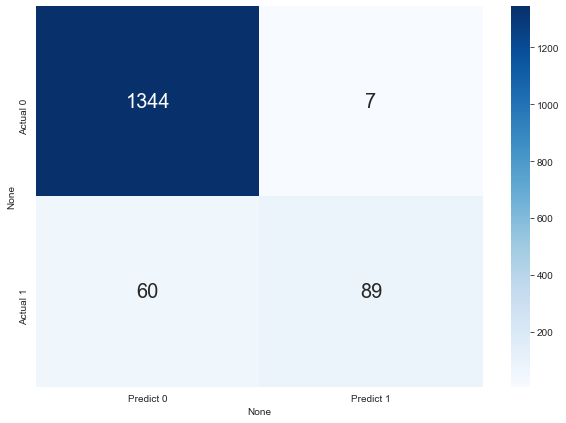

In [40]:
# No scientific notations, display up to two decimal
pd.options.display.float_format = '{:,.2f}'.format
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size":20})

------------------
## 5. **(10 marks)** Find out coefficients of all the attributes and show the output in a data frame with column names? 
------------------

In [41]:
dfCoef = pd.DataFrame(lm.coef_, columns=X_test.columns, index=["Coefficient"])
dfCoef['intercept'.upper()] = lm.intercept_
dfCoef

,Income,CCAvg,Mortgage,Securities Account,CD Account,2,3,4,Graduate,Undergrad,INTERCEPT
Coefficient,0.05,0.20,0.00,-0.65,2.21,-0.31,1.69,0.94,-0.25,-3.56,-7.68


<AxesSubplot:>

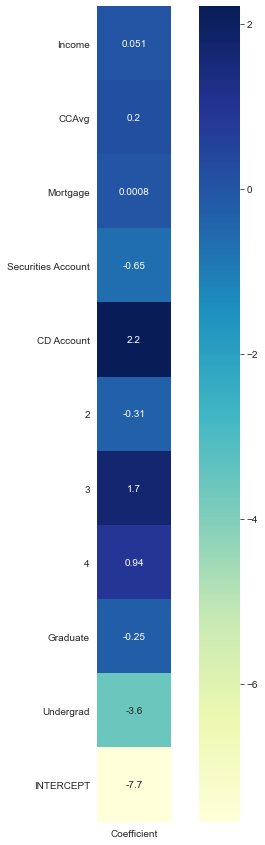

In [42]:
ig, ax = plt.subplots(figsize=(10,15)) 
sns.heatmap((dfCoef).transpose() , annot=True , square=True, cmap= 'YlGnBu')

## For test data show all the rows where the predicted class is not equal to the observed class. 

ID
933     0
3348    0
3989    1
3272    1
350     1
       ..
1794    1
814     1
3767    1
422     1
3652    1
Name: Personal Loan, Length: 67, dtype: int64

Verification Value: True


<AxesSubplot:xlabel='Personal Loan'>

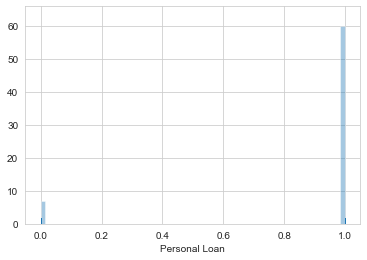

In [43]:
df000=y_test[y_test != yPred]

compare = pd.DataFrame(data=[df000.values] , index=['Discrepancy']).transpose()
# compare['Test'] = y_test.values
# compare['Predict'] = yPred.values

# compare['Predicted'] = yPred

print(df000)
print()
print("Verification Value:", df000.size == fp + fn)

sns.distplot(df000, bins=df000.size, rug=True, kde=False)

------------------
## 6. **(5 marks)** Give conclusion related to the Business understanding of your model? 
------------------


##### `Confusion matrix means`
Based on the data provided, we split the data into two sets, one to train, 30%, and the other to test, 70%. Using our modeling we were able to generate a Confusion Matrix which classifies the performance of our Logistic Regression Model. The confusion matrix is split into four cells describing correct and incorrect Predictions when compared to Actual/Observed.

*True Positive (TP)*
 - (Actual=1,Predicted=1):
     - We correctly predicted that 89 customers took the loan.
 
*True Negative (TN)* 
 - (Actual=0,Predicted=0):
     - We correctly predicted that 1344 customers did not take the loan.
 
*False Positive (FP)* 
 - (Actual=0,Predicted=1)
     - Type I error: We incorrectly (Falsely-Positive) predicted that 7 would take the loan.

*False Negative (FN)* 
 - (Actual=1,Predicted=0):
     - Type II error: We incorrectly (Falsely-Negative) predicted that 60 would not take the loan.
     
#### `Important Metrics`
Thera Bank is looking to hold a Personal Loan Campaign in which it attempts to bring in customers as it did last time. Previously they were able to capture 9.6% acceptance of the personal loans offered.

This is an opportunity to convert their Liability accounts into Personal Loan customers.

In case of False negative bank will not lose out on customers but that okay because the bank would want to retain money more than customers who are not eligible for loan.

In the case of False positives, efforts and resources could be wasted if not focusing on the right clients, but it is not significant.

After achieving the desired accuracy, we can deploy the model for practical use. The model can be used for anticipating features matches in future/new customers.

### `Important Metric`
The focus should not be heavily on the Recall metric because the target 'Personal Loan' works best abroad for a marketing context, there is no risk of loss. The ultimate goal is to capture as many potential 'leads' as possible to convert some liability. Instead the Precision/Sensitivity method should be the main focus.

After achieving the desired accuracy we can deploy the model for practical use. The Personal Loan campaign can be more precision and remove wasted efforts in identifying true target potential customers. So the bank can use the model for upcoming customers.


##### `Features of Interest`
'Mortgages' appeared to have been either imputed prior to receiving the data of which was not modified and left as is until further clarification is provided. The total impact was 3462 entries at 69.24% affected.
'Experience' had 52 discrepant entries (1.04 %) with negative professional experience so those values were imputed with the mean of the feature.
'Income', 'Family', 'CCAvg','Education', 'Mortgage', 'Securities Account','CD Account','Personal Loan' are the features influencing the model's output.

# Compressed Insights

### Impressions of the Data Set
- ID: Looking at the head & tail of ID, this can be used as key/index & dropped.
- Only CCAvg is Float values, all others are Integers. No Objects/strings/bools, etc.
- 5000 customers; 13 attribute column. Assuming ID doesn't count since it will be used as index.
###### Binary classifications.
    - Securities Account
    - CD Account
    - Online
    - CreditCard
    - Personal Loan

###### Non-Binary classifications.
    - ZIP Code: Multi category, might not relevant
    - Family: 4 category classifications
    - Education: 3 category classifications

###### Other
    - Age
    - Experience -- values less than 0, not possible
    - Income
    - CCAvg: -- Avg. credit card spend
    - Mortgage: -- Mortgage Commitment

#### Insight: 
 - No Null values present. May indicate data has been cleaned.
 - Visual confirmation of Experience having values below 0.
 - Visual confirmation of 0s in Mortgage.
      - Asumption data was already imputed but replaced with zero, instead of dropping or mean method. 
      - There is no way to validate with the current data sample.
          - These are many 0 entries, so will need to impute (again). 
 - Everything else looks like have no 'misfit' values looking at the catagorical columns.
 
#### Considering Mortgage of 0 is such a big impact, I've left alone until further data/information is presented.

### Univariate Analysis
- There are 7 categorical features
    - 2 of them are multicategory: Family & Education
    - 5 of them are Y/N, binary: 'Personal Loan', 'Securities Account','CD Account', 'Online', 'CreditCard'
    - Zip has 467 unique values and not continous. Not enough value for our algorithm so will not be used.
- Our target variable is 'Personal Loan' and is a binary classification. Linear Regression would not be appropriate for this target.
- Total people with zero mortgage: 3462 that is 69.24 %
- Total people with no Credit Card spend: 106 that is 2.12 % 
- Most people dont have a mortgage. Some may be renters or have paid off their home.
- only a very small set of the population in the dataset don't use credit cards.
 
- About 60% of users have online accounts.
- Customers are not heavily 'integrated' into the banks financial products.
    - On review of CD Account, Securities and Credit Card (highest at ~29%)
- The amount of Personal loans are at 10%.
    - Potential Target Market is the rest of existing customers of 90%

- Education
    - Most quantity in order of value: 1, 2, 4, 3
- Family
    - The majority of customers are of value 1.
- ZIP Code is to spread and provides no value for our model with relation Personal Loan

- Catigorical, Use of Count Plot seemed most approriate: 
    - Credit Card, CD Account, Securities Account, (personal loan) are left-skewed.
    - Online is right skewed but the use is questionable.
    - Zip code was not even considered when palette was added, indicating too many unique variables.


- Continous, used displot
    - Family, Education, Age, Experience is evently distributed.
    - Income is left-skewed.
    - Mortgage is left-skewed and highly impacted by the 0 value.


- Other considerations:
    - We can visually confirm the previously assessed.
        - Most customers are of Family value 1 that are Undergradates followed by Family value 2.
    - The bank does not have many Existing Personal Loan, Securities and CD Accounts.
        - However, Creidt card its highest Financial Product which visually seems like less than 50%.
    - Many Customers are online but there is also a large chunk that are not.

    - Age & Experience seems to be uniformly distributed with seemly high correlation.
        - We may be able to drop for our model.
    - Mortgage has a high outlier count at 0 mortgage. 
        - This could be renters or people who have paid off their mortgage. Insufficient data available to make determination.



### Bivariate Analysis
   - Income & CCAvg are most impactful in favoring Personal loan outcome
        - People with Higher Income and Higher CC Avg Spend for those who accepted the loan

- Target variable: Personal Loan
    - While Experience & Age seem to have a linear correlation, relationship appears to have no impact on if someone took a Personal Loan last time.
    - A trend that seemed to appear, those with Higher Income & High Mortgages are more likely to take out a Personal Loan
    - A trend that seemed to appear, larger families with High Income, appear to be more likely to take a personal loan.
    - Loooking in deeper at the Income and Personal loan, those that did take the personal loan had incomes of a little over 50+ to a little over 200+ (in thousands)

- Confirmed Age & Experience have a linear relationship. May be able to substitue on another.
- Looking at the heatmap, the highest correlations with personal loan are Income, CCAvg, a CD Account (respectively)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~ Metrics ~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
- 96.14% Trainig accuracy
- 95.53% Testing accuracy

- 92.71% Precision
- 59.73% Recall

- 72.65% F1-Score
    - was improved by using Dummy for Family & Education.
    - was improved by removing least relevant columns like ZIP CODE
- 79.61% Roc Auc Score
- 59.21% Gini Correlation
